In [153]:
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

Data 

In [154]:
file_path=os.path.join(os.getcwd(),"dataset","train.csv")

df = pd.read_csv(file_path)

In [155]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


### Overview

Duplicate Removal 

In [156]:
def remove_duplicates(df):
    """
    Remove duplicates from a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - DataFrame with duplicates removed
    """
    # Print the shape before removing duplicates
    print("Shape before removing duplicates:", df.shape)

    # Remove duplicates
    df_no_duplicates = df.drop_duplicates()

    # Print the shape after removing duplicates
    print("Shape after removing duplicates:", df_no_duplicates.shape)

    return df_no_duplicates


df=remove_duplicates(df=df)

Shape before removing duplicates: (6500, 20)
Shape after removing duplicates: (6500, 20)


Data Shape

df.shape

Columns

In [157]:
df.columns

Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')

Columns Lables

In [158]:
# Replace spaces with underscores in column labels
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [159]:
df.columns

Index(['Customer_Id', 'Artist_Name', 'Artist_Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price_Of_Sculpture', 'Base_Shipping_Price',
       'International', 'Express_Shipment', 'Installation_Included',
       'Transport', 'Fragile', 'Customer_Information', 'Remote_Location',
       'Scheduled_Date', 'Delivery_Date', 'Customer_Location', 'Cost'],
      dtype='object')

NAN Values

Columns with Percentage of Missing Values:
Artist_Reputation: 11.54%
Height: 5.77%
Width: 8.98%
Weight: 9.03%
Material: 11.75%
Transport: 21.42%
Remote_Location: 11.86%


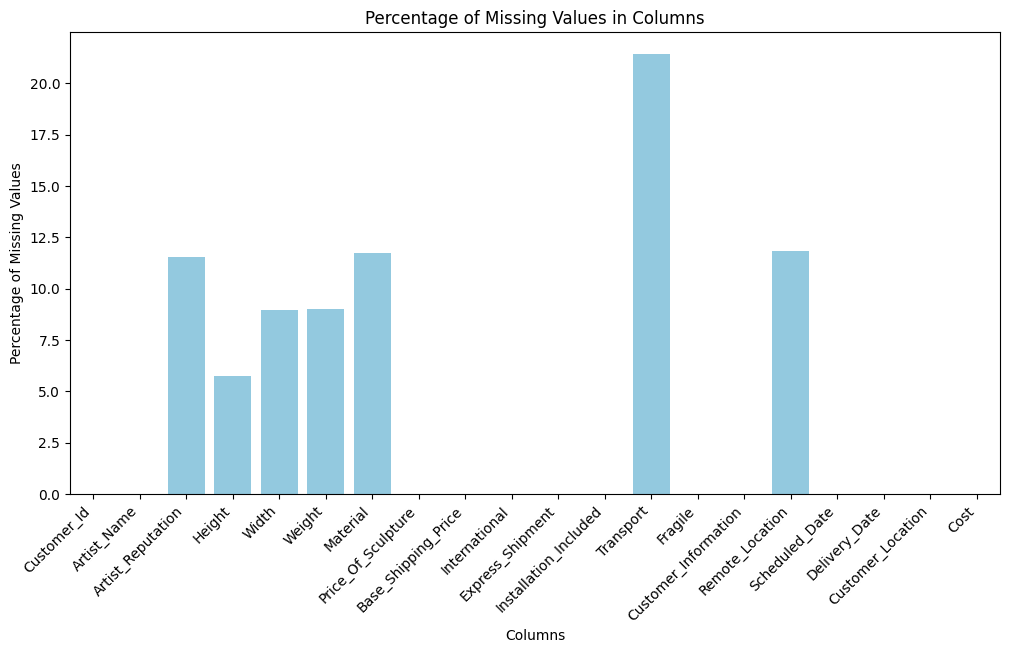

In [160]:
def plot_missing_values(df):
    """
    Plot missing values in the columns of a DataFrame and print columns with their percentage of missing values.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - None (displays the plot)
    """
    # Calculate the percentage of missing values in each column
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    # Print columns with their percentage of missing values
    print("Columns with Percentage of Missing Values:")
    for col, percentage in missing_percentage.items():
        if percentage != 0 :
            print(f"{col}: {percentage:.2f}%")

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_percentage.index, y=missing_percentage.values, color='skyblue')
    plt.title('Percentage of Missing Values in Columns')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

    
    
plot_missing_values(df=df)

Dropping Irrelevant columns 

In [161]:

df=df.drop(columns=["Artist_Name","Customer_Id"])

Conisdering Dropping data of columns 
-  Material 

In [162]:
def split_numerical_categorical_labels(df):
    """
    Identify and return labels of numerical and categorical columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - numerical_labels: List of labels for numerical columns
    - categorical_labels: List of labels for categorical columns
    """
    # Identify numerical columns
    numerical_labels = list(df.select_dtypes(include=['number']).columns)

    # Identify categorical columns
    categorical_labels = list(df.select_dtypes(include=['object', 'category']).columns)

    return numerical_labels, categorical_labels


numerical_labels, categorical_labels = split_numerical_categorical_labels(df=df)

### Numerical Data

In [163]:
numerical_labels

['Artist_Reputation',
 'Height',
 'Width',
 'Weight',
 'Price_Of_Sculpture',
 'Base_Shipping_Price',
 'Cost']

In [164]:
df[numerical_labels]

,Artist_Reputation,Height,Width,Weight,Price_Of_Sculpture,Base_Shipping_Price,Cost
0,0.26,17.0,6.0,4128.0,13.91,16.27,-283.29
1,0.28,3.0,3.0,61.0,6.83,15.00,-159.96
2,0.07,8.0,5.0,237.0,4.96,21.18,-154.29
3,0.12,9.0,NaN,NaN,5.81,16.31,-161.16
4,0.15,17.0,6.0,324.0,3.18,11.94,-159.23
...,...,...,...,...,...,...,...
6495,0.37,37.0,10.0,16551.0,28.28,38.46,872.43
6496,0.67,15.0,NaN,18981.0,67.18,27.72,1347.02
6497,0.68,19.0,8.0,587.0,6.92,10.38,354.55
6498,0.02,33.0,9.0,1269377.0,2929.13,69.76,5037.50


Columns with Percentage of Missing Values:
Artist_Reputation: 11.54%
Height: 5.77%
Width: 8.98%
Weight: 9.03%


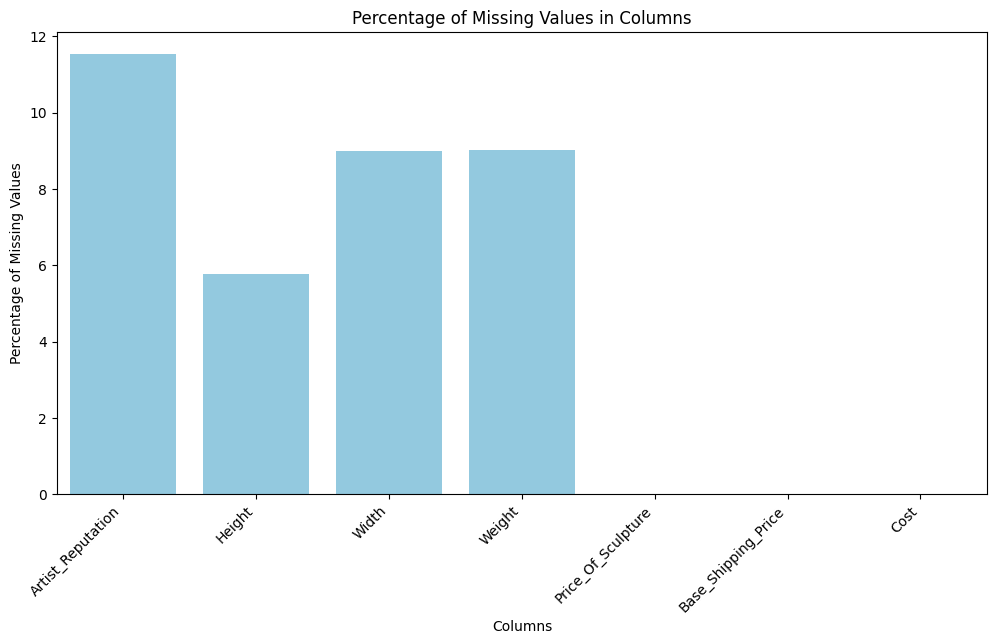

In [165]:
plot_missing_values(df=df[numerical_labels])

Histplot

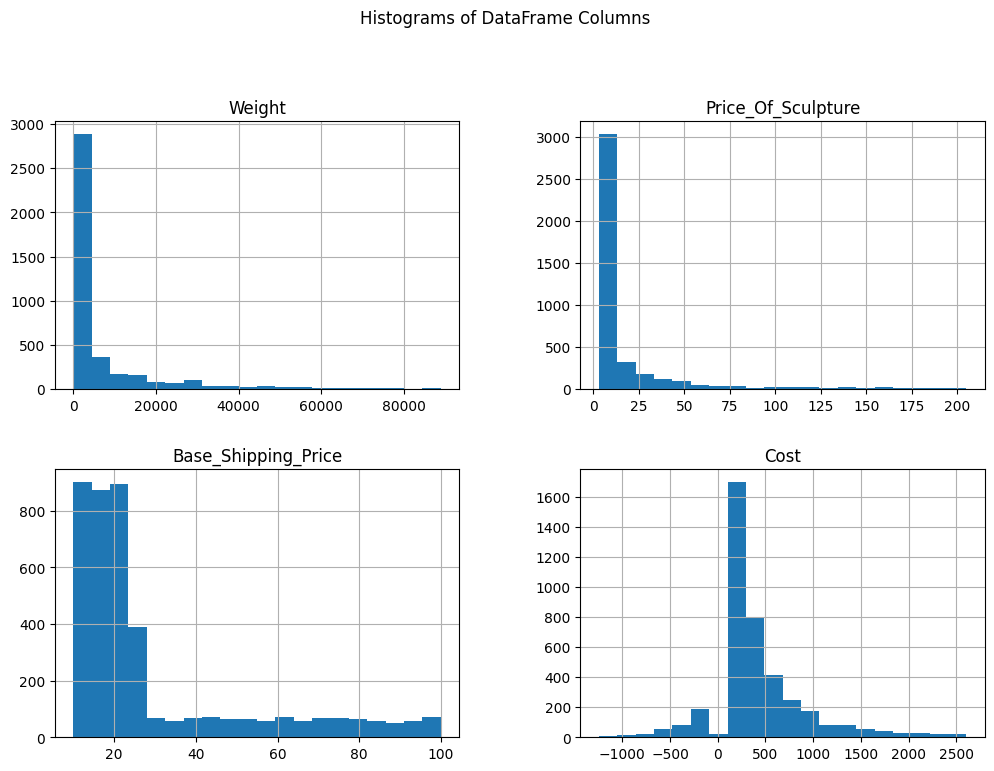

In [202]:
def plot_histograms(df):
    """
    Plot histograms for each column in a DataFrame.

    Parameters:
    - df: pandas DataFrame
    """
    # Use the hist method to plot histograms for all columns
    df.hist(figsize=(12, 8), bins=20)
    
    # Set plot labels and title
    plt.suptitle("Histograms of DataFrame Columns", y=1.02)
    plt.show()
    
    
plot_histograms(df=df[numerical_labels])

Artist Reputation

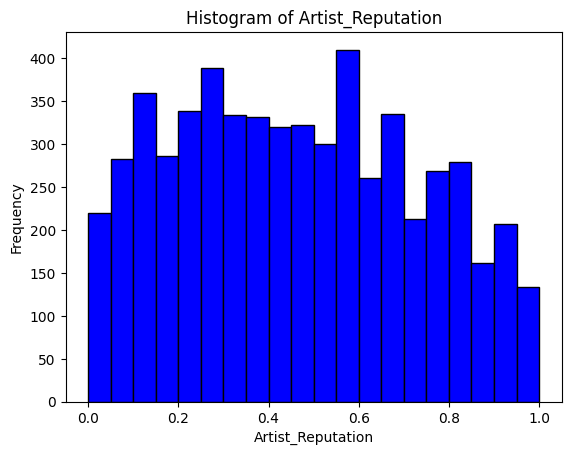

In [166]:
def plot_histogram(data_frame, column_label):
    """
    Plot a histogram for a specified column in a DataFrame.

    Parameters:
    - data_frame: Pandas DataFrame
    - column_label: String, the label of the column for which to plot the histogram
    """
    # Check if the column exists in the DataFrame
    if column_label not in data_frame.columns:
        print(f"Error: Column '{column_label}' not found in the DataFrame.")
        return

    # Plot histogram
    plt.hist(data_frame[column_label], bins=20, color='blue', edgecolor='black')
    
    # Add labels and title
    plt.xlabel(column_label)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_label}')
    
    # Show the plot
    plt.show()
    
    
plot_histogram(data_frame=df, column_label="Artist_Reputation")

In [167]:
def create_reputation_category_column(data_frame, column_label, bin_edges, bin_labels):
    """
    Replace the existing column with corresponding categories based on binning for artist reputation.

    Parameters:
    - data_frame: Pandas DataFrame
    - column_label: String, the label of the column to replace with categorical values
    - bin_edges: List, the edges of the bins for binning the reputation values
    - bin_labels: List, the labels for the reputation categories

    Returns:
    - data_frame: Updated DataFrame with the existing column replaced by categorical values
    """
    # Check if the column exists in the DataFrame
    if column_label not in data_frame.columns:
        print(f"Error: Column '{column_label}' not found in the DataFrame.")
        return data_frame.copy()  # Return a copy of the original DataFrame

    # Replace the existing column with corresponding categories based on binning
    data_frame[column_label] = pd.cut(data_frame[column_label], bins=bin_edges, labels=bin_labels, include_lowest=True)

    return data_frame


This code organizes an artist's reputation into categories with different levels, including 'Low_Reputation,' 'Moderate_Reputation,' 'High_Reputation,' and 'Very_High_Reputation.'

 It sets up these levels based on specified boundaries (bin edges) and then uses a function to create a new column in a table of data (DataFrame) for the artists, categorizing them according to their reputation levels.

In [168]:
# Define bin edges and labels
reputation_bin_edges = [0, 0.3, 0.6, 0.9, 1.0]
reputation_bin_labels = ['Low_Reputation', 'Moderate_Reputation', 'High_Reputation', 'Very_High_Reputation']
# Use the function to add a new categorical column
df = create_reputation_category_column(df, 'Artist_Reputation', reputation_bin_edges, reputation_bin_labels)

In [169]:
df.head()

,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Remote_Location,Scheduled_Date,Delivery_Date,Customer_Location,Cost
0,Low_Reputation,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,Low_Reputation,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,Low_Reputation,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,Low_Reputation,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,Low_Reputation,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [170]:
import numpy as np

Replacing Nan values in the Artist Reputation with random Categorical Bins created from Numerical data

In [171]:

def replace_nan_with_random_categories(data_frame, column_label):
    """
    Replace NaN values in a specified categorical column with random categories.

    Parameters:
    - data_frame: Pandas DataFrame
    - column_label: String, the label of the categorical column to replace NaN values

    Returns:
    - data_frame: Updated DataFrame with NaN values replaced by random categories
    """
    # Check if the column exists in the DataFrame
    if column_label not in data_frame.columns:
        print(f"Error: Column '{column_label}' not found in the DataFrame.")
        return data_frame.copy()  # Return a copy of the original DataFrame

    # Get the list of unique categories in the column
    categories = data_frame[column_label].dropna().unique()

    # Replace NaN values with random categories
    random_categories = np.random.choice(categories, size=data_frame[column_label].isnull().sum())
    data_frame.loc[data_frame[column_label].isnull(), column_label] = random_categories

    return data_frame

df=replace_nan_with_random_categories(data_frame=df, column_label="Artist_Reputation")

Weight 

In [172]:
# Drop rows with NaN values in the specified column
df = df.dropna(subset=["Material"])

In [173]:
def mean_weight_by_material(dataframe, material_column, weight_column):
    """
    Find the mean of 'weight' values for each category in 'Material' column,
    excluding rows with NaN values in the 'weight' column.

    Parameters:
    - dataframe: pandas DataFrame
    - material_column: str, name of the categorical column 'Material'
    - weight_column: str, name of the column 'weight'

    Returns:
    - mean_by_material: pandas Series with the mean weight for each material category
    """
    # Drop rows with NaN values in the 'weight' column
    df_without_nan = dataframe.dropna(subset=[weight_column])

    # Group by 'Material' and calculate the mean of 'weight' for each category
    mean_by_material = df_without_nan.groupby(material_column)[weight_column].mean()
    
    print(f" {mean_by_material} ")

    return mean_by_material



mean_by_material=mean_weight_by_material(dataframe=df, material_column="Material", weight_column="Weight")

 Material
Aluminium    1.351587e+03
Brass        2.789967e+04
Bronze       1.697773e+04
Clay         3.427542e+03
Marble       7.584780e+05
Stone        2.151031e+06
Wood         3.968911e+02
Name: Weight, dtype: float64 


This code fills in missing values in the "Weight" column of a DataFrame (df). It uses the apply method to go through each row. If the "Weight" is missing (NaN), it replaces it with an average weight based on the item's material. If the "Weight" is already present, it remains unchanged. The goal is to ensure all items have a weight, using material-specific averages for missing values.

Columns with Percentage of Missing Values:
Height: 5.20%
Width: 8.25%
Weight: 8.30%
Transport: 19.84%
Remote_Location: 11.09%


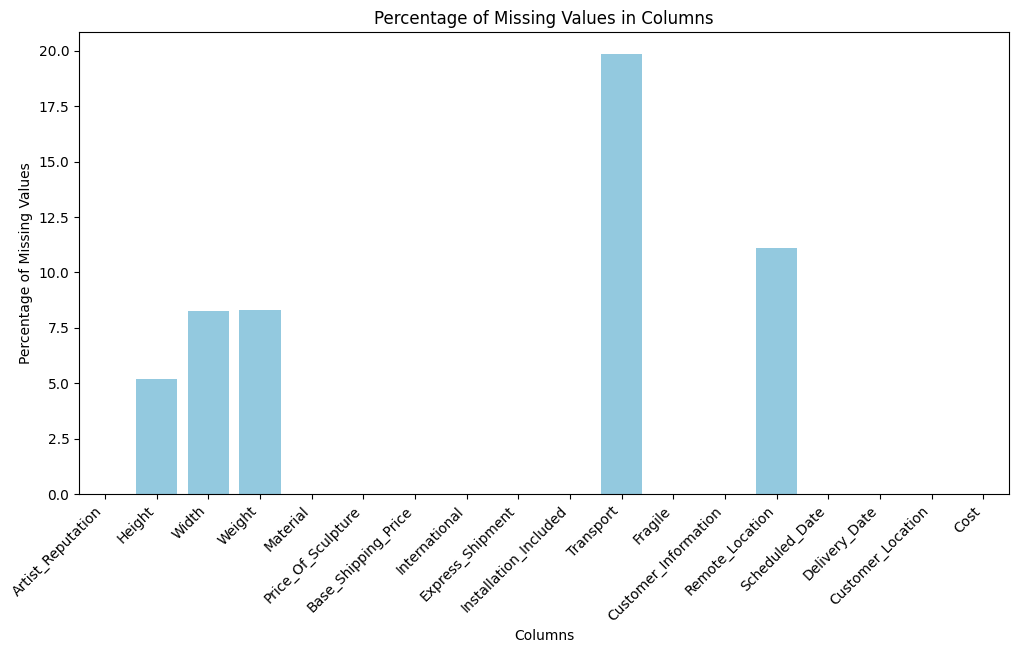

In [174]:
plot_missing_values(df=df)

In [175]:
# Replace NaN values in the "Weight" column with the corresponding values from the Series
df['Weight'] = df.apply(lambda row: mean_by_material[row['Material']] if pd.isna(row['Weight']) else row['Weight'], axis=1)


Columns with Percentage of Missing Values:
Height: 5.20%
Width: 8.25%


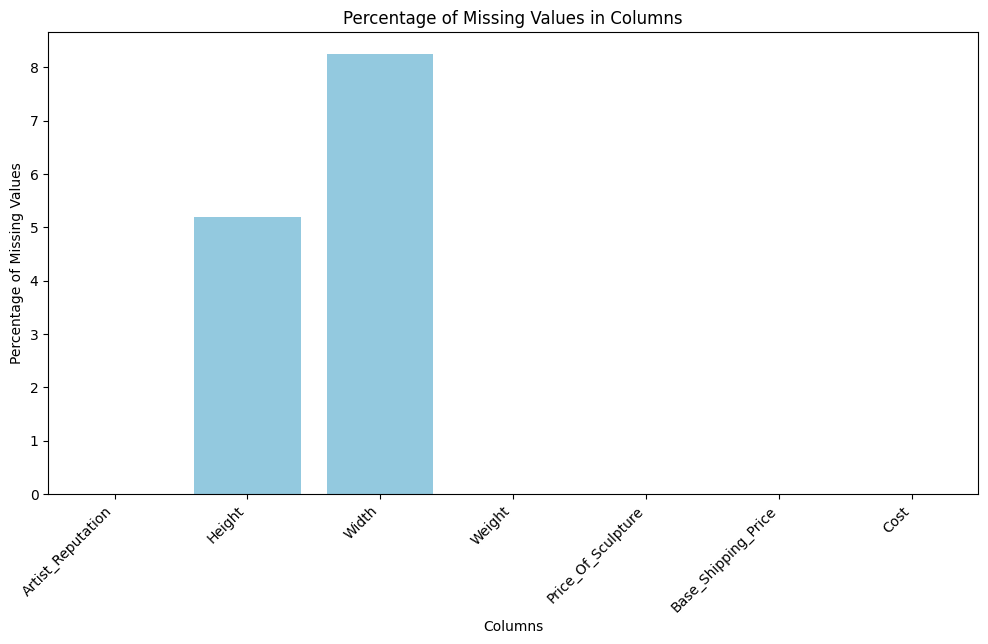

In [176]:
plot_missing_values(df=df[numerical_labels])

Columns with Percentage of Missing Values:
Height: 5.20%
Width: 8.25%


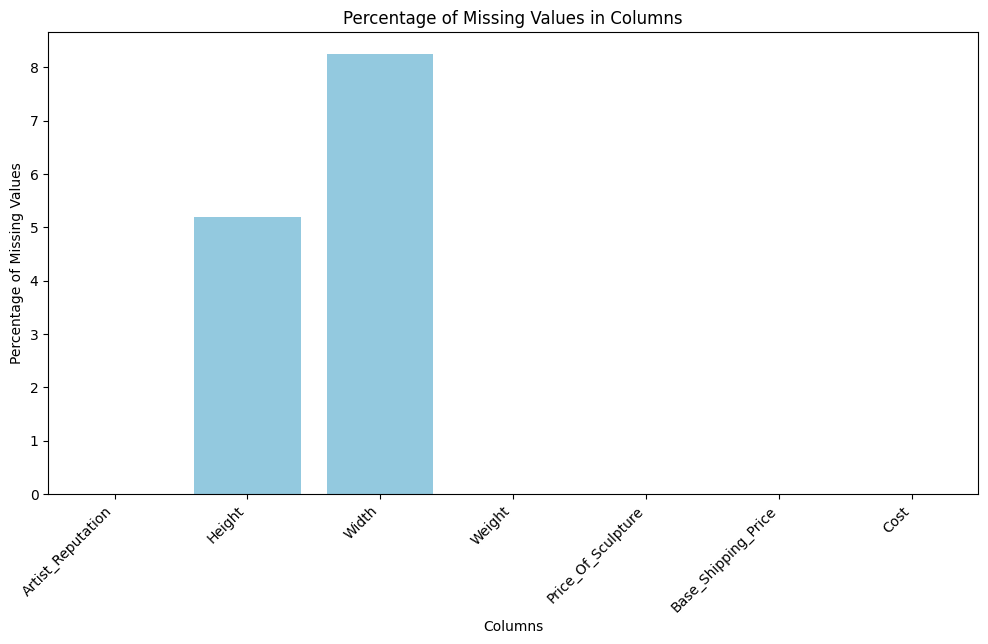

In [177]:
plot_missing_values(df=df[numerical_labels])

Considering the Weight column as a more relevant feature for estimating the scope of sculptural dropping height, it is essential to give emphasis to the weight column in the analysis.

Dropping Height and Weight Column

In [178]:
columns_to_drop=["Height","Width"]
df = df.drop(columns=columns_to_drop)

### Categorical Data 

In [179]:
categorical_labels

['Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information',
 'Remote_Location',
 'Scheduled_Date',
 'Delivery_Date',
 'Customer_Location']

Dropping rows which no data of material

Material

In [180]:
# Drop rows with NaN values in the specified column
# Print the shape of the DataFrame before dropping rows with NaN values
print(f"Shape before dropping NaN values: {df.shape}")

# Drop rows with NaN values in the specified column
df = df.dropna(subset=["Material"])

# Print the shape of the DataFrame after dropping rows with NaN values
print(f"Shape after dropping NaN values: {df.shape}")

# Display the DataFrame after dropping rows with NaN values
print("\nDataFrame after dropping NaN values:")



Shape before dropping NaN values: (5736, 16)
Shape after dropping NaN values: (5736, 16)

DataFrame after dropping NaN values:


Transport 

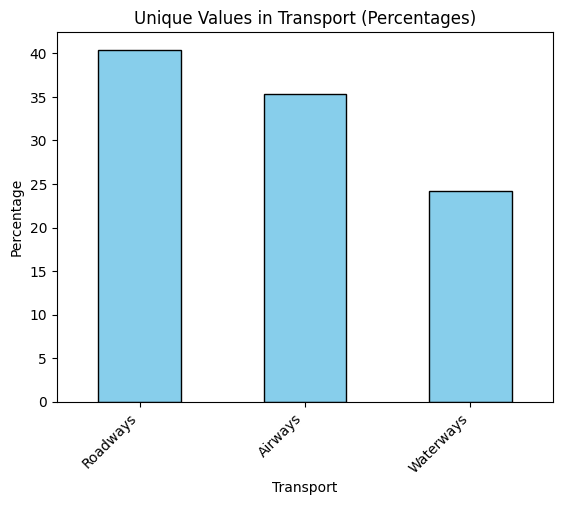

In [181]:
def plot_categorical_unique_values(df, column_label):
    """
    Plot unique values in a specific categorical column along with their percentages.

    Parameters:
    - df: pandas DataFrame
    - column_label: Label of the categorical column to plot
    """
    # Check if the specified column exists in the DataFrame
    if column_label not in df.columns:
        print(f"Column '{column_label}' not found in the DataFrame.")
        return

    # Plot unique values for the specified categorical column
    value_counts = df[column_label].value_counts(normalize=True) * 100  # Calculate percentages
    value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    
    # Set plot labels and title
    plt.title(f'Unique Values in {column_label} (Percentages)')
    plt.xlabel(column_label)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()
    
    
plot_categorical_unique_values(df=df, column_label="Transport")

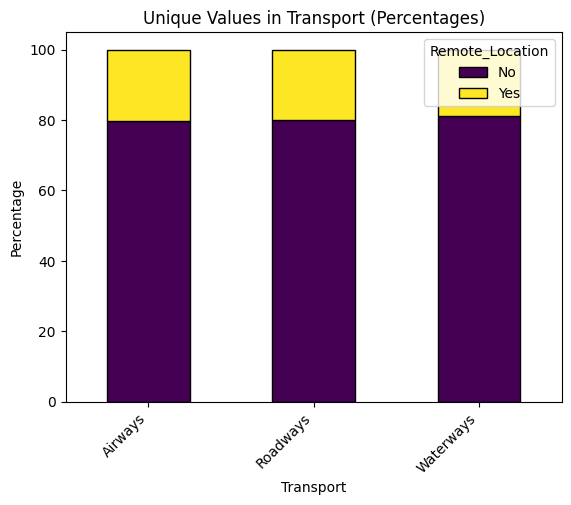

In [182]:
def plot_categorical_unique_values(df, column_label, hue_column=None):
    """
    Plot unique values in a specific categorical column along with their percentages.

    Parameters:
    - df: pandas DataFrame
    - column_label: Label of the categorical column to plot
    - hue_column: Optional, label of a second categorical column for coloring the bars
    """
    # Check if the specified column exists in the DataFrame
    if column_label not in df.columns:
        print(f"Column '{column_label}' not found in the DataFrame.")
        return

    # Check if the hue column exists
    if hue_column and hue_column not in df.columns:
        print(f"Hue column '{hue_column}' not found in the DataFrame.")
        return

    # Plot unique values for the specified categorical column with or without hue
    if hue_column:
        g = df.groupby([column_label, hue_column]).size().unstack()
        g = g.div(g.sum(axis=1), axis=0) * 100  # Convert to percentages
        g.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black')
    else:
        value_counts = df[column_label].value_counts(normalize=True) * 100  # Calculate percentages
        value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    # Set plot labels and title
    plt.title(f'Unique Values in {column_label} (Percentages)')
    plt.xlabel(column_label)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()


plot_categorical_unique_values(df, column_label="Transport", hue_column="Remote_Location")

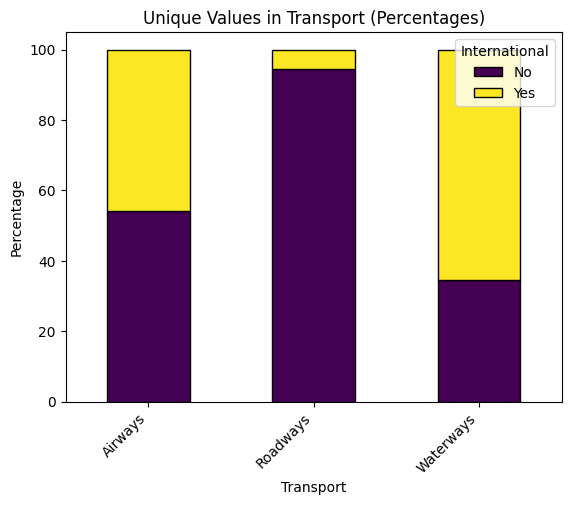

In [183]:
plot_categorical_unique_values(df, column_label="Transport", hue_column="International")

Shipping Which are domestically shipped are Mostly done with Roadways

Filling NA values in Transport column with Domestic Shipping as Roadways

In [184]:
def fill_transport_for_international_no(df, fill_value='Roadways'):
    """
    Fill NaN values in the "Transport" column with a specified value where "International" is "No".

    Parameters:
    - df: pandas DataFrame
    - fill_value: Value to fill in the "Transport" column (default is 'Roadways')

    Returns:
    - modified_df: DataFrame with NaN values filled in the "Transport" column
    """
    # Make a copy of the original DataFrame to avoid modifying it directly
    modified_df = df.copy()

    # Calculate the count of NaN values in "Transport" before the operation
    before_count = modified_df['Transport'].isna().sum()

    # Use boolean indexing to identify rows where "International" is "No" and "Transport" is NaN
    mask = (modified_df['International'] == 'No') & modified_df['Transport'].isna()

    # Fill NaN values in "Transport" with the specified value
    modified_df.loc[mask, 'Transport'] = fill_value

    # Calculate the count of NaN values in "Transport" after the operation
    after_count = modified_df['Transport'].isna().sum()

    # Print the count of NaN values before and after the operation
    print(f"NaN Count in 'Transport' before: {before_count}")
    print(f"NaN Count in 'Transport' after: {after_count}")

    return modified_df



df=fill_transport_for_international_no(df=df)

NaN Count in 'Transport' before: 1138
NaN Count in 'Transport' after: 357


Dropping rest of the Data rows from the Transport Column

In [185]:
df = df.dropna(subset=["Transport"])

Columns with Percentage of Missing Values:
Remote_Location: 10.71%


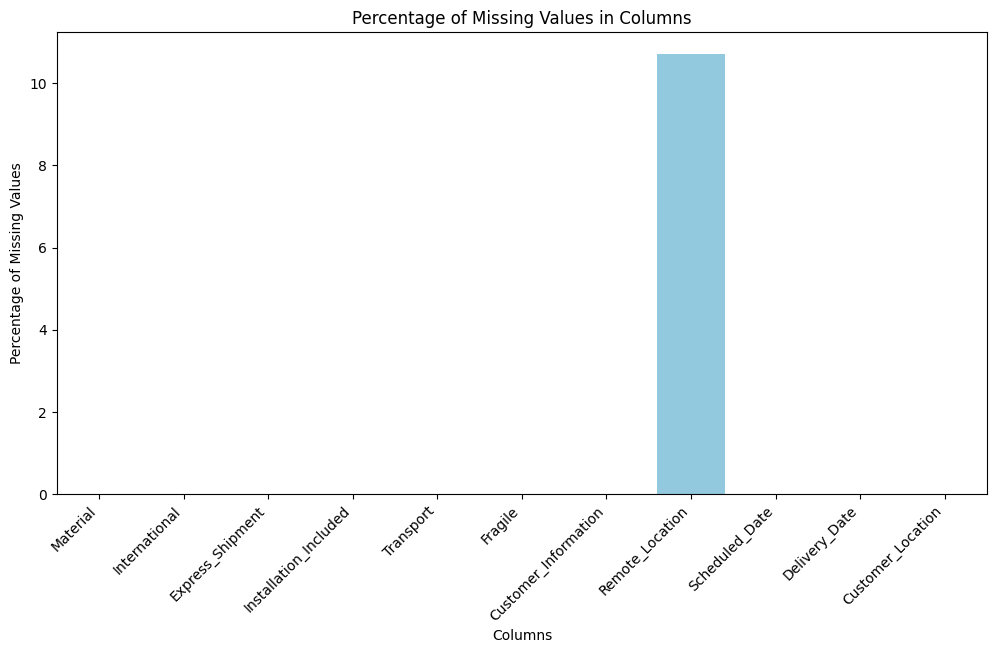

In [186]:
plot_missing_values(df=df[categorical_labels])

Dropping Remote location 

In [187]:
df=df.drop(columns=["Remote_Location"])

Dropping Date Columns

In [188]:
df=df.drop(columns=['Scheduled_Date', 'Delivery_Date'])

Dropping Customer Location 

In [189]:
df=df.drop(columns=["Customer_Location"])

In [190]:
df.head()

,Artist_Reputation,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Cost
0,Low_Reputation,4128.000000,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,-283.29
1,Low_Reputation,61.000000,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,-159.96
2,Low_Reputation,237.000000,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,-154.29
3,Low_Reputation,1351.586819,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,-161.16
4,Low_Reputation,324.000000,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,-159.23


### Outlier

In [191]:
import numpy as np

In [192]:
class OutlierBoxPlotter:
    def __init__(self, df, numerical_columns):
        self.df = df
        self.numerical_columns = numerical_columns
        self.outliers = None
        self.filtered_df = None

    def plot_box_plot(self, title):
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=self.df[self.numerical_columns])
        plt.title(title)
        plt.show()

    def identify_outliers(self, threshold=1.5):
        self.outliers = pd.DataFrame()

        for column in self.numerical_columns:
            q1 = np.percentile(self.df[column], 25)
            q3 = np.percentile(self.df[column], 75)
            iqr = q3 - q1

            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            column_outliers = (self.df[column] < lower_bound) | (self.df[column] > upper_bound)
            self.outliers[column] = column_outliers

            # Print only count of outliers removed for each column
            outliers_removed = self.df[column][column_outliers]
            outliers_removed_count = outliers_removed.count()
            print(f"Count of outliers removed from '{column}': {outliers_removed_count}\n")

    def remove_outliers(self):
        if self.outliers is not None:
            self.filtered_df = self.df[~self.outliers.any(axis=1)]
            # Print shape before and after outlier removal
            print(f"Shape before outlier removal: {self.df.shape}")
            print(f"Shape after outlier removal: {self.filtered_df.shape}")
        else:
            print("Outliers not identified. Please run identify_outliers() first.")

    def plot_before_after(self, title_before, title_after):
        plt.figure(figsize=(15, 6))

        plt.subplot(1, 2, 1)
        sns.boxplot(data=self.df[self.numerical_columns])
        plt.title(title_before)

        plt.subplot(1, 2, 2)
        sns.boxplot(data=self.filtered_df[self.numerical_columns])
        plt.title(title_after)

        plt.show()

    def get_filtered_dataframe(self):
        if self.filtered_df is not None:
            return self.filtered_df
        else:
            print("Filtered DataFrame is not available. Please run remove_outliers() first.")
            return None

In [194]:
numerical_labels

['Artist_Reputation',
 'Height',
 'Width',
 'Weight',
 'Price_Of_Sculpture',
 'Base_Shipping_Price',
 'Cost']

In [199]:
numerical_labels=[
 'Weight',
 'Price_Of_Sculpture',
 'Base_Shipping_Price',
 'Cost']

Count of outliers removed from 'Weight': 1003

Count of outliers removed from 'Price_Of_Sculpture': 993

Count of outliers removed from 'Base_Shipping_Price': 0

Count of outliers removed from 'Cost': 976

Shape before outlier removal: (5379, 12)
Shape after outlier removal: (4081, 12)


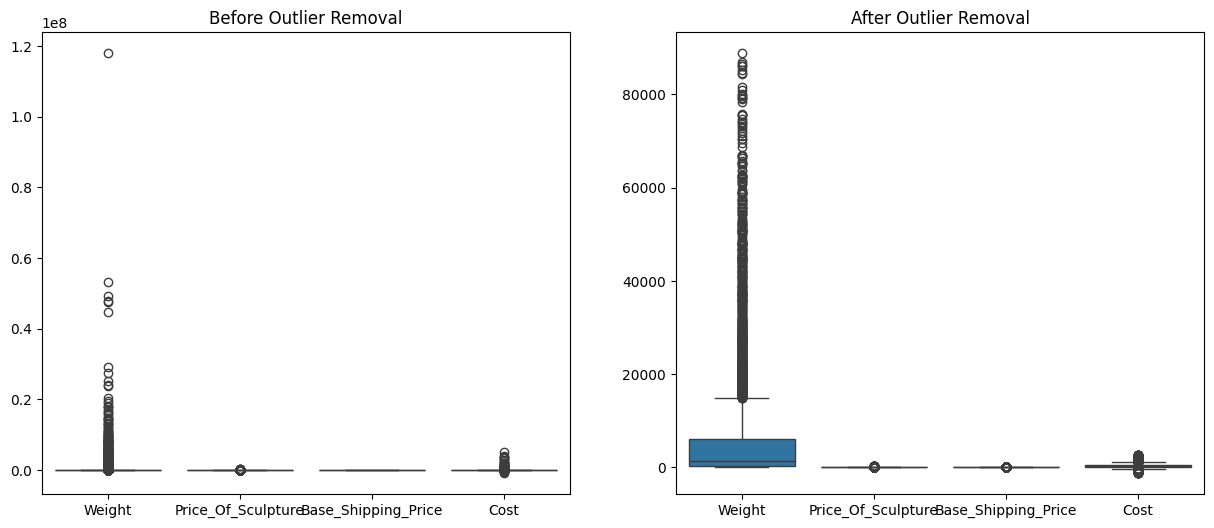

In [200]:
outlier_box_plotter = OutlierBoxPlotter(df,numerical_columns=numerical_labels)

# Identify outliers using default threshold (1.5)
outlier_box_plotter.identify_outliers()

# Remove outliers
outlier_box_plotter.remove_outliers()

# Plot both box plots side by side for comparison
outlier_box_plotter.plot_before_after("Before Outlier Removal", "After Outlier Removal")

In [201]:
df=outlier_box_plotter.get_filtered_dataframe()

In [206]:
def save_dataframe_as_csv(dataframe, folder_name, file_name='output.csv'):
    # Create the folder if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # Construct the full path to the CSV file
    file_path = os.path.join(folder_name, file_name)

    # Save the DataFrame to CSV
    dataframe.to_csv(file_path, index=False)

    print(f"DataFrame saved as CSV: {file_path}")

save_dataframe_as_csv(dataframe=df, folder_name="Transformed_data", file_name='EDA.csv')

DataFrame saved as CSV: Transformed_data\EDA.csv
